# Loan Prediction Analysis

# Problem Statement:

About Company:
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

# Importing Libraries

In [168]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [169]:
import pandas as pd                       # for reading the files
import numpy as np                        # for creating multi-dimensional-array
import matplotlib.pyplot as plt           # for plotting
import seaborn as sns                     # for data visulization
import warnings  
from statistics import mean 
from sklearn import tree
from sklearn import metrics# for ignoring the warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.metrics import classification_report
import scikitplot as skplt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

# Import the Data Files

In [306]:
test= pd.read_csv('test.csv')
train= pd.read_csv('train.csv')

Test File

In [171]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [172]:
test.shape

(367, 12)

Training File

In [173]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [174]:
train.shape

(614, 13)

Creating a copy of file so that any changes made doesn't affect the original datasets

In [175]:
test_original= test.copy()
train_original= train.copy()

Checking the Data Types of Variables

In [176]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [177]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Univariant Analysis
(Examing each variable individually)

1. Target Variable i.e. 'Loan Status'

In [178]:
train['Loan_Status'].value_counts()                    #counting the values of different Loan Status

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: >

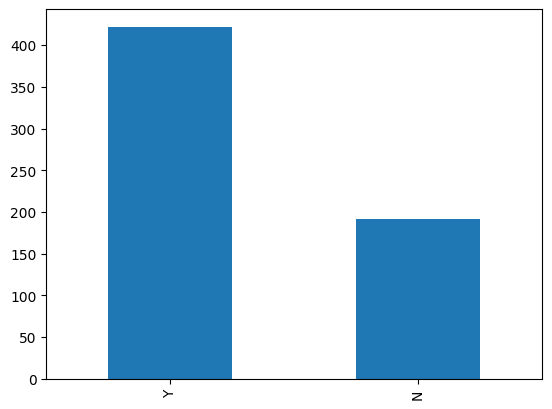

In [179]:
train['Loan_Status'].value_counts().plot.bar()         

Text(0.5, 1.0, 'Loan Status')

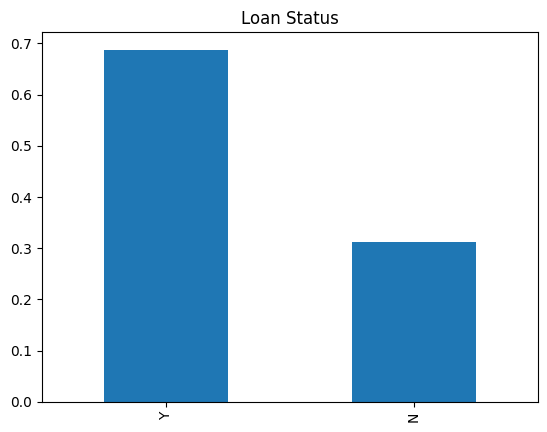

In [180]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()
# normalize = True will give the probability in y-axis

plt.title("Loan Status")

Plots for Independent Categorical Variables

<Axes: title={'center': 'Credit_History'}>

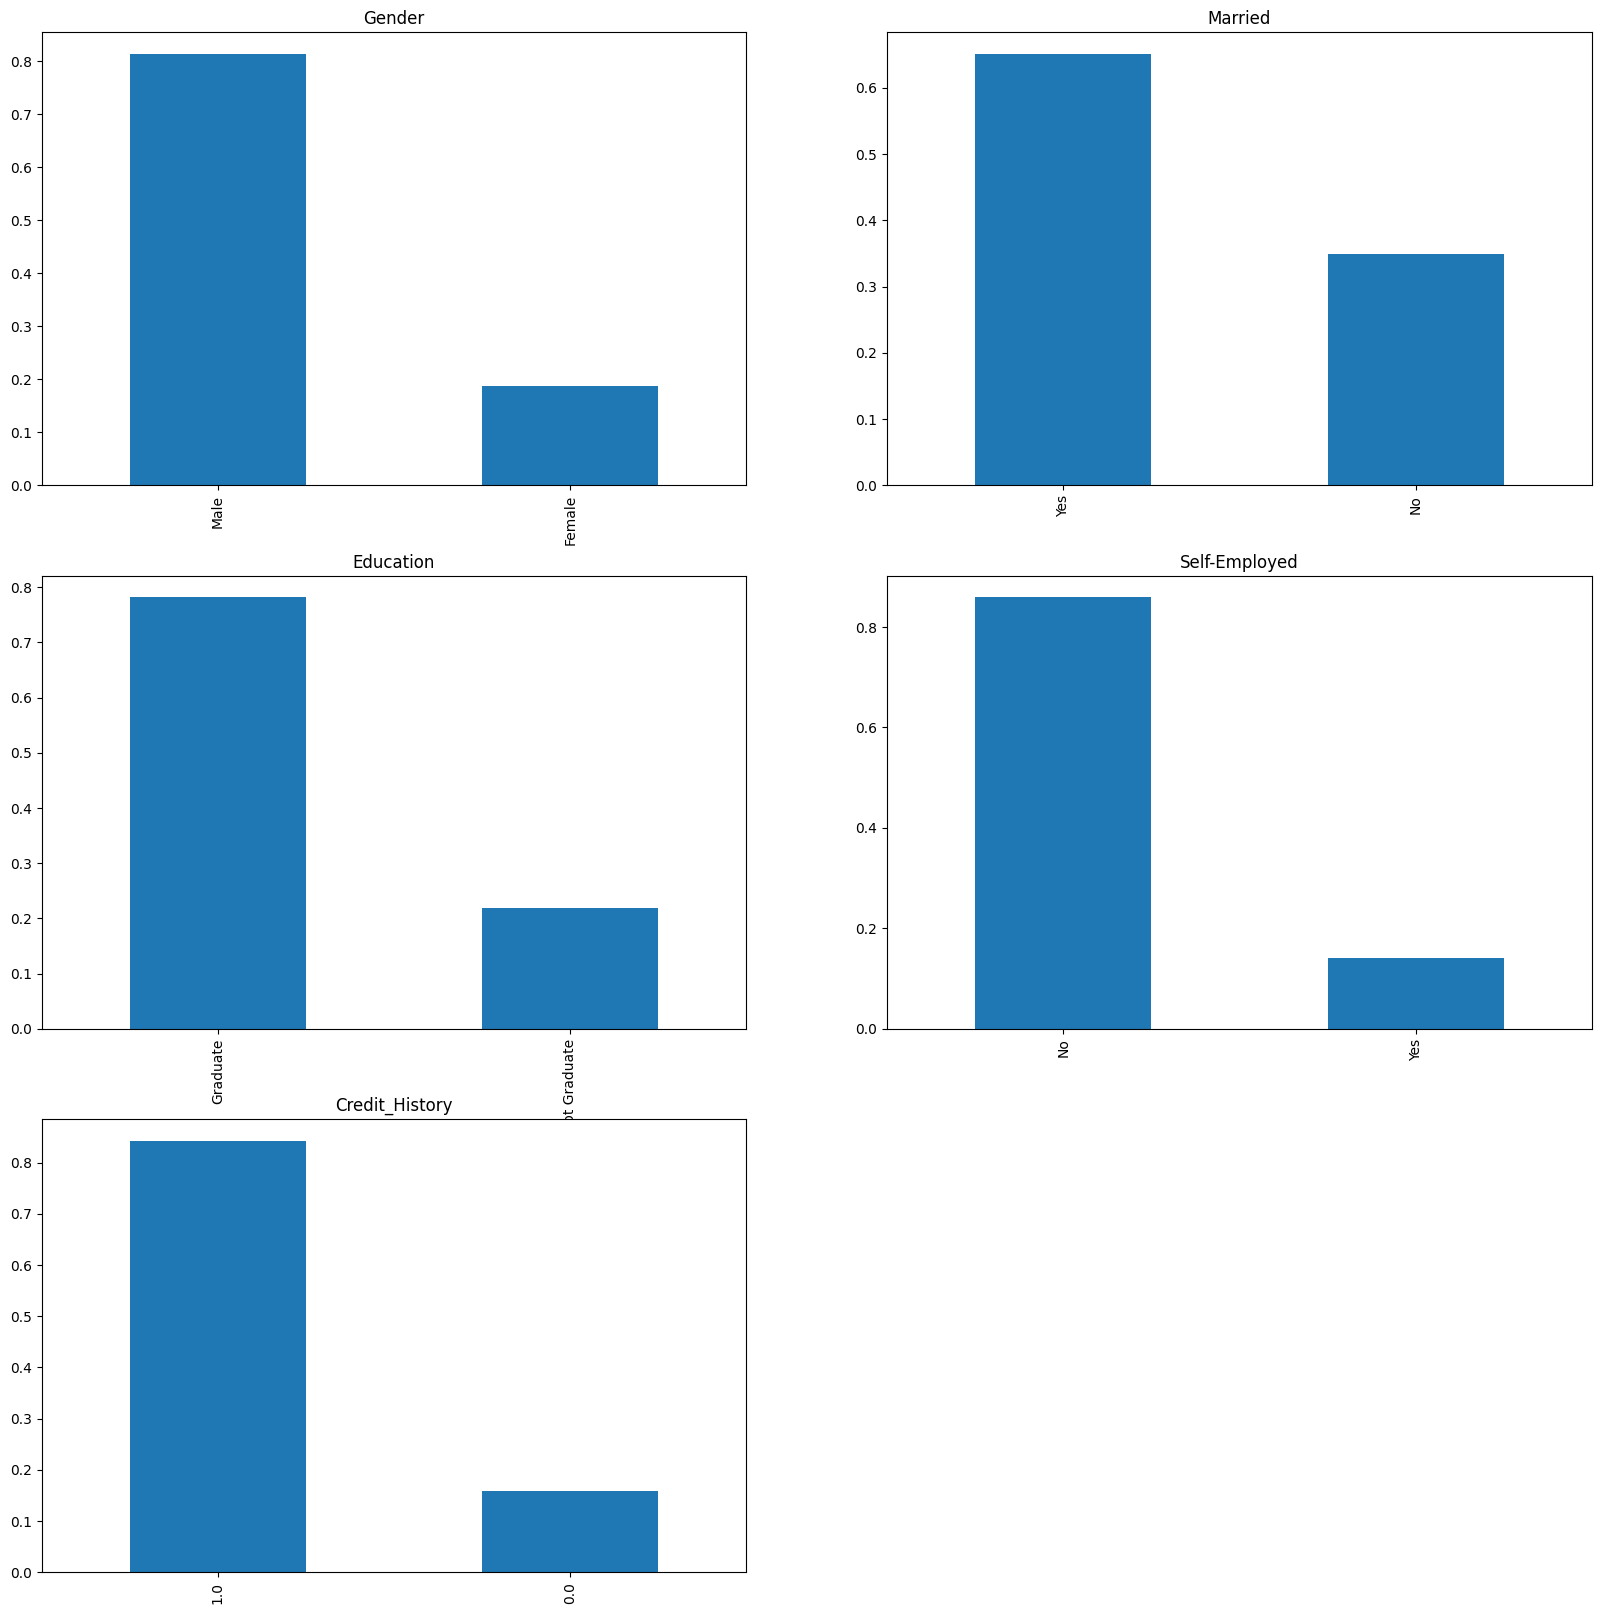

In [181]:
plt.figure()
plt.subplot(321)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Gender')

plt.subplot(322)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Married')

plt.subplot(323)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Education')

plt.subplot(324)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Self-Employed')

plt.subplot(325)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Credit_History')

Plots for Independent Ordinal Variables

<Axes: title={'center': 'Property Area'}>

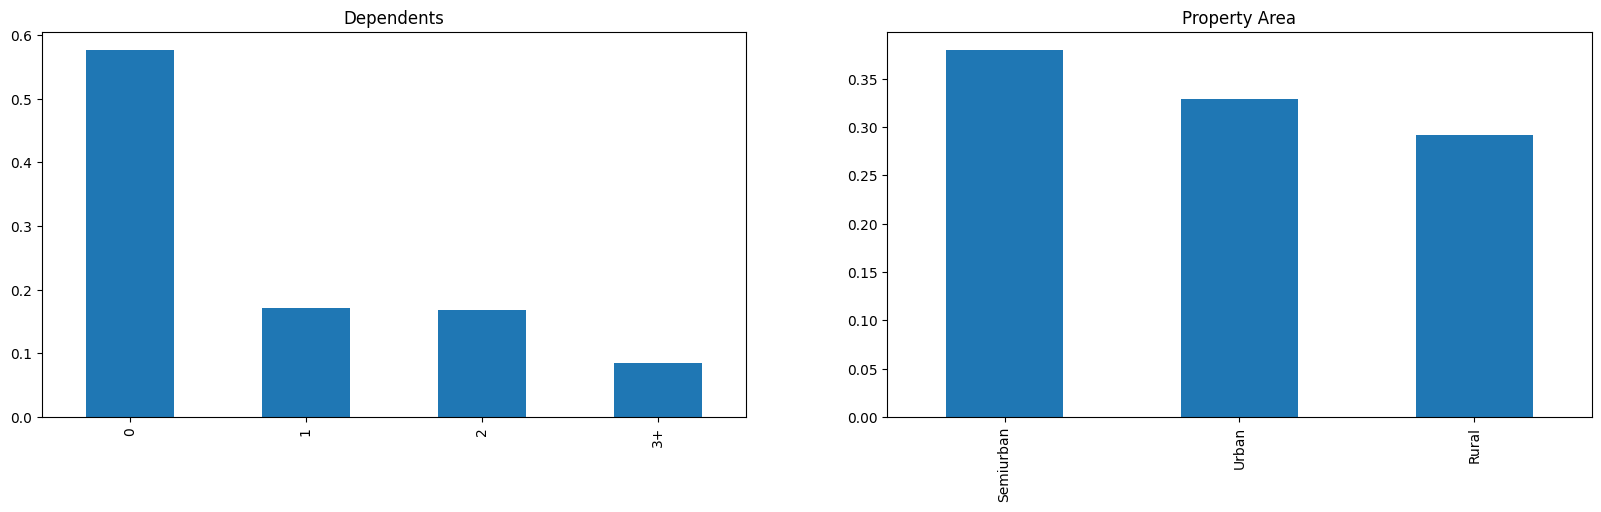

In [182]:
plt.figure()
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Property Area')

Plots for Independent Numerical Variables

Applicant Income

<Axes: >

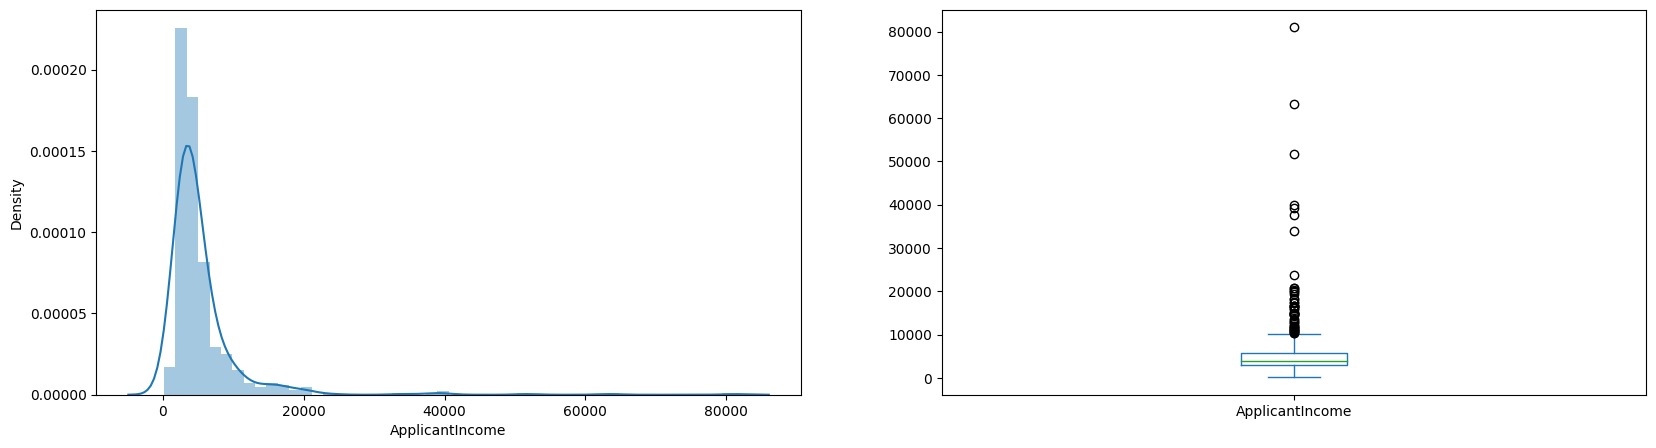

In [183]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(20,5))

Text(0.5, 0.98, '')

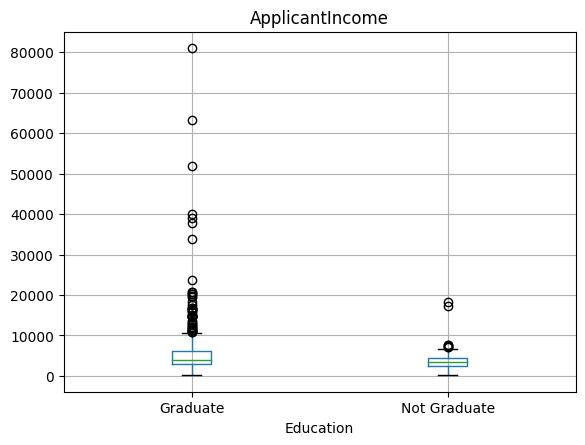

In [184]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

Co-applicant Income

<Axes: >

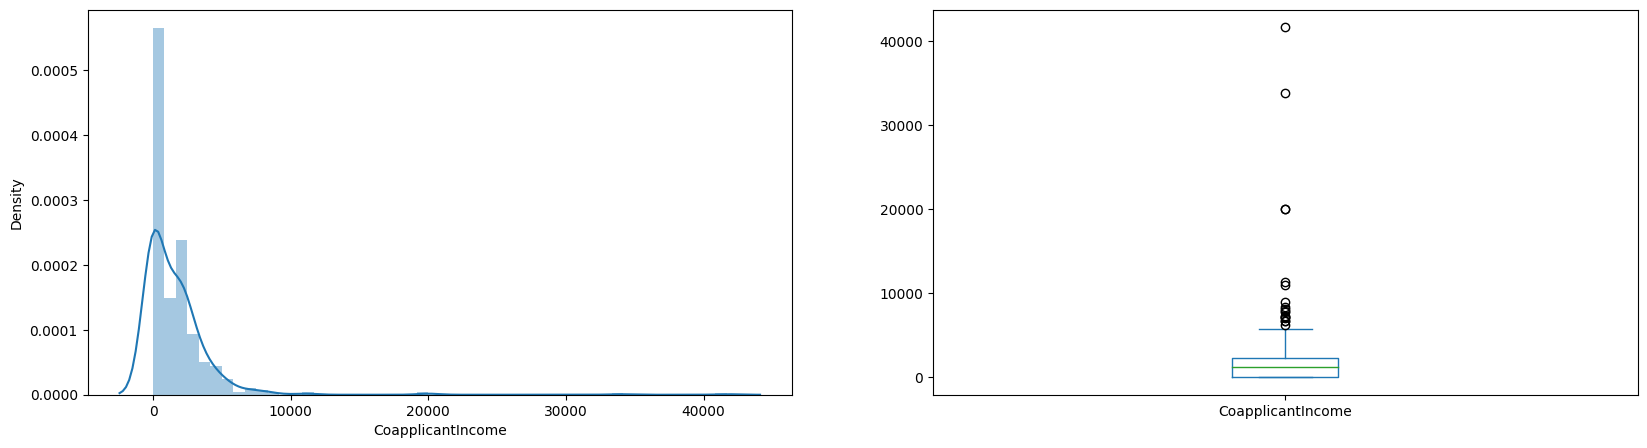

In [185]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(20,5))

<Axes: >

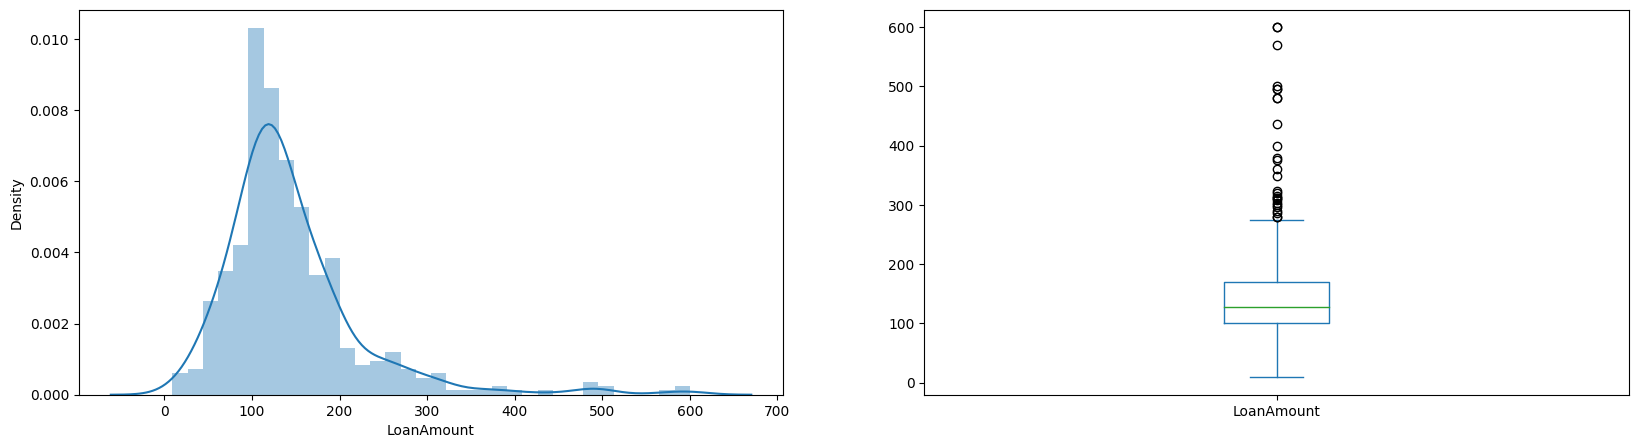

In [186]:
df=train.dropna()
plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(20,5))

# Bivariant Analysis
(Examing two variables at a time)

Frequency Table for Gender and Loan Status

In [187]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<Axes: xlabel='Gender'>

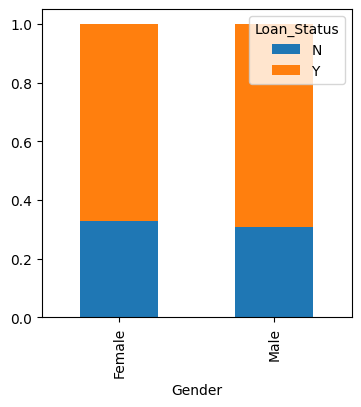

In [188]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Frequency Table for Married and Loan Status

In [189]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


<Axes: xlabel='Married'>

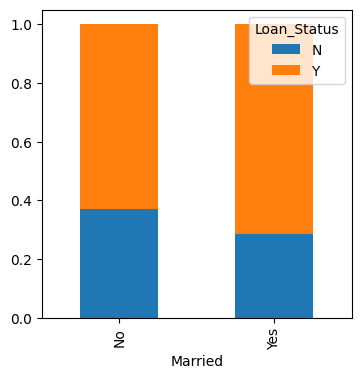

In [190]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Frequency Table for Dependents and Loan Status

In [191]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


<Axes: xlabel='Dependents'>

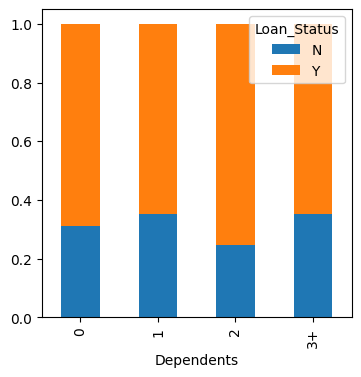

In [192]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Frequency Table for Education and Loan Status

In [193]:
Education= pd.crosstab(train['Education'],train['Loan_Status'])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


<Axes: xlabel='Education'>

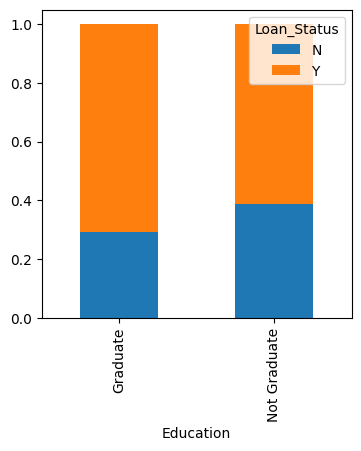

In [194]:
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4) )

Frequency Table for Self Employed and Loan Status

In [195]:
Self_Employed= pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


<Axes: xlabel='Self_Employed'>

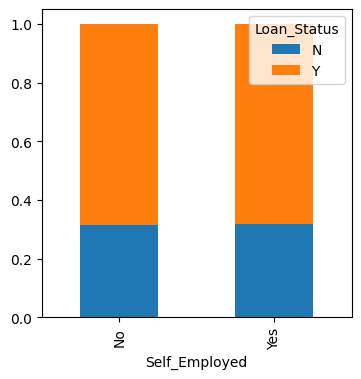

In [196]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Frequency Table for Credit History and Loan Status

In [197]:
Credit_History= pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<Axes: xlabel='Credit_History'>

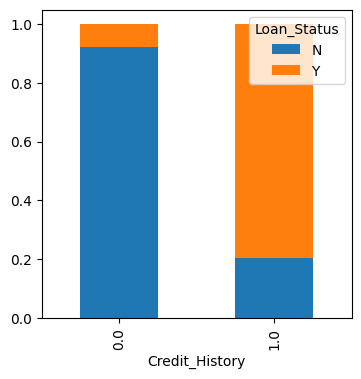

In [198]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

Frequency Table for Property Area and Loan Status

In [199]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


<Axes: xlabel='Property_Area'>

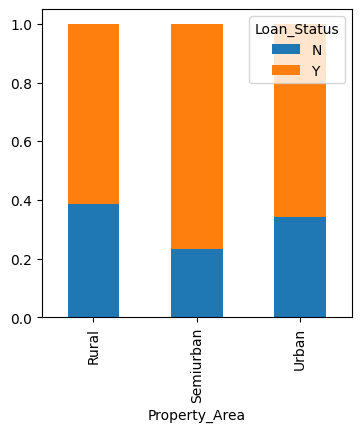

In [200]:
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Plotting of Numerical Categorical Variable and Loan Status

In [201]:
bins=[0,2500,4000,6000,8100] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

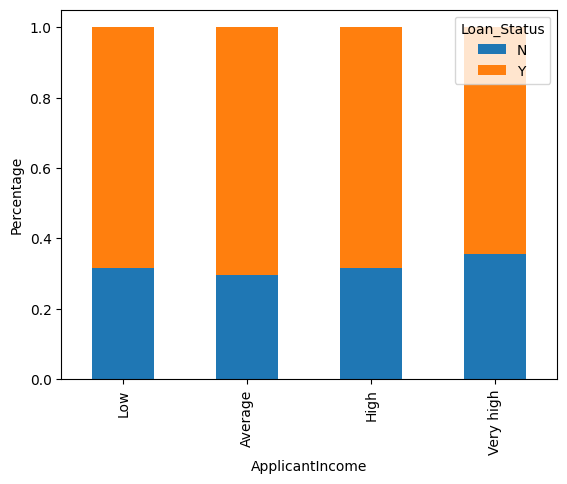

In [202]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P=plt.ylabel('Percentage')

Doing the same for Coapplicant Income

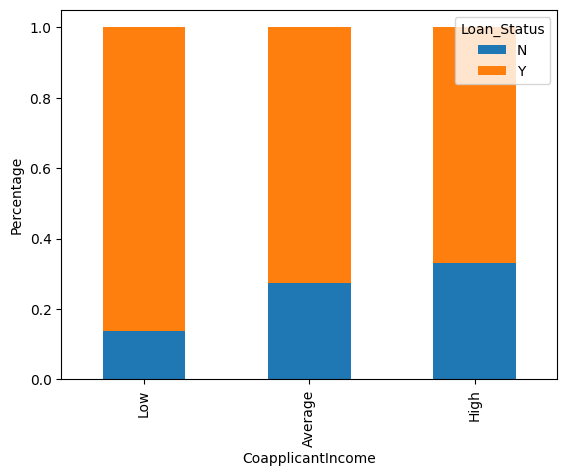

In [203]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

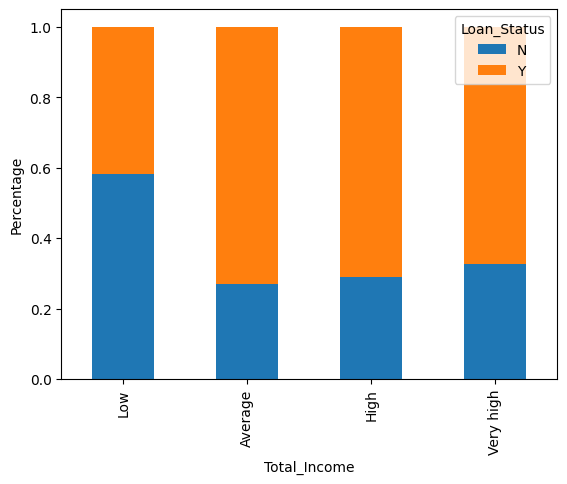

In [204]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

Plotting of Loan Amount and Loan Status

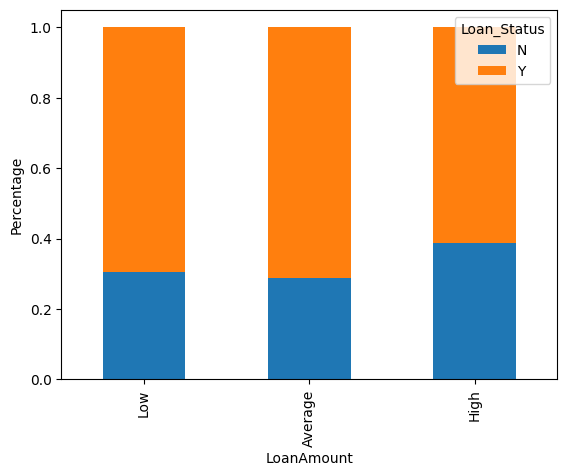

In [205]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')


Change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 

In [206]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 

Convert the target variable 'Loan Status' categories into 0 and 1 for logistic regression

In [207]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

# Correlation using Heatmaps

<Axes: >

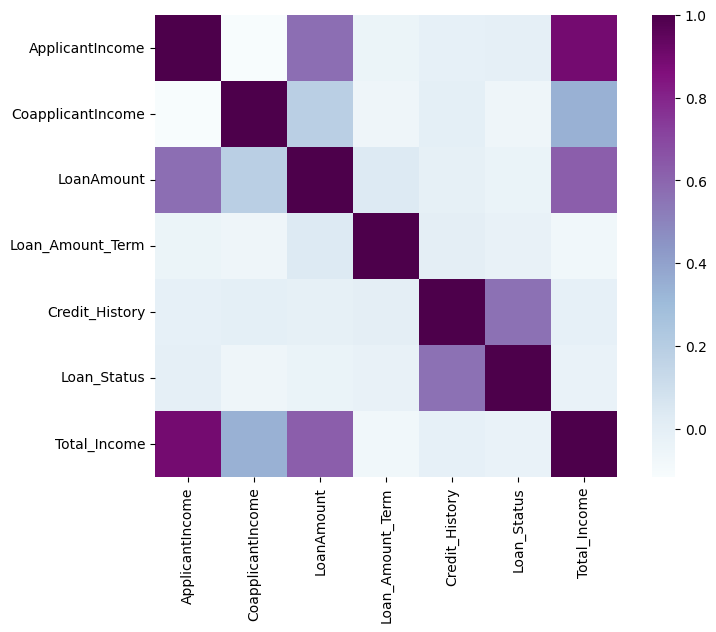

In [208]:
matrix = train.corr() 
plt.figure(figsize=(9,6))
sns.heatmap(matrix, square=True, cmap="BuPu")

In [209]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [210]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


# Handling the missing Data

Checking the number of null values

In [211]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term.
So replacing the null values with the mode of the respective colums so that the values does not affect the result.

In [212]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [213]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [214]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [215]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [216]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [217]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [218]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [219]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

In [220]:
test['Married'].fillna(test['Married'].mode()[0],inplace=True)

In [221]:
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

In [222]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

In [223]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [224]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [225]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

# Outlier Treatment

There are many outliers in the LoanAmount.Doing the log transformation to make the distribution look normal.

<Axes: >

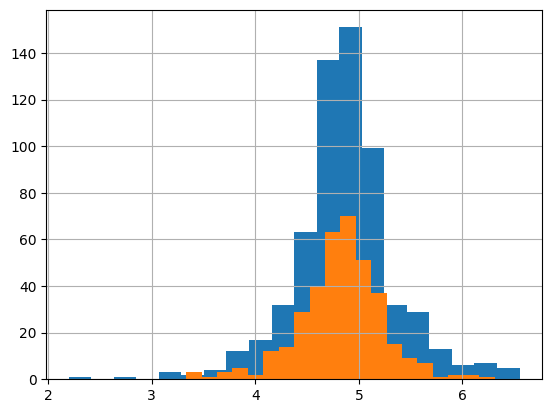

In [226]:

train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 


test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

# Model Building

Loan_ID won't be used in the analysis.So, dropping the Loan_ID Column

In [227]:
train=train.drop('Loan_ID',axis=1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [228]:
test=test.drop('Loan_ID',axis=1)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709


In [229]:
train=train.drop('Gender',axis=1)
test=test.drop('Gender',axis=1)

In [230]:
train=train.drop('Dependents',axis=1)
test=test.drop('Dependents',axis=1)

In [231]:
train=train.drop('Self_Employed',axis=1)
test=test.drop('Self_Employed',axis=1)

Also dropping the Loan_Status column and storing it in another variable.

In [232]:
x=train.drop('Loan_Status',axis=1)
x.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,No,Graduate,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Yes,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Yes,Graduate,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Yes,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,No,Graduate,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [233]:
y=train['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Creating Dummy Varible

In [234]:
x=pd.get_dummies(x) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [235]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,1,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,1,0,1,0,0,0,1


In [236]:
def stratified_cross_validation(model):
    
    """This function performs Stratified Shuffle Split. Accepts the model as an argument and returns stratified 
    randomized fold scores and model predictions"""
    
    counter=1 
    pred_scores=[]
    kf = StratifiedShuffleSplit(n_splits=4,random_state=1,test_size= 0.25) 
    for train_index,test_index in kf.split(X,y):
        xtr,xvl = X.loc[train_index],X.loc[test_index]
        ytr,yvl = y[train_index],y[test_index]
        model.fit(xtr, ytr)
        pred_test = model.predict(xvl)
        score = accuracy_score(yvl,pred_test)   
        counter+=1 
        pred=model.predict_proba(xvl)[:,1]
        pred_scores.append(score)
    return pred_scores, pred_test

In [237]:
def display_cf_matrix(y_cv,model_pred):
    
    """This function draws the confusion matrix. Accepts true values of the target and the predicted values of the target made by 
    the model as an argument"""
    
    cf_matrix = confusion_matrix(y_cv,model_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    labels = [f"{v1}: {v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [238]:
def accuracy_metrics(y_test,predictions):

  """This function prints the classification report of the model which includes Precion, Recall and F-1 Score"""

  report = classification_report(y_test, predictions)
  print(report)

Baseline Model: Applying Logistic Regression

In [239]:
x_train, x_cv, y_train, y_cv = train_test_split(x,y, train_size =0.75,random_state=0)

In [240]:
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [241]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

In [242]:
baseline_lr = model.predict(x_cv)


In [243]:
print("Accuracy of the Baseline Model is {}".format(round(accuracy_score(y_cv,baseline_lr)*100,2)), "%")

Accuracy of the Baseline Model is 83.77 %


In [244]:
accuracy_metrics(y_cv,baseline_lr)

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



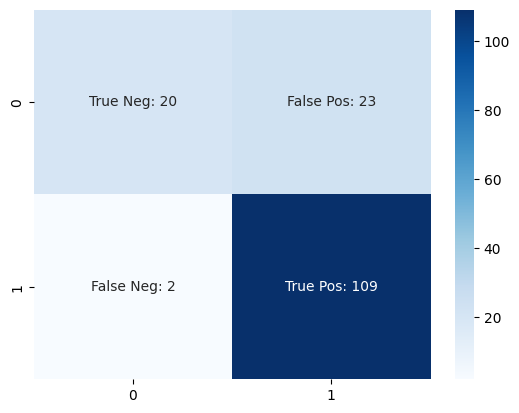

In [245]:
display_cf_matrix(y_cv,baseline_lr)


Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We can come up with following new three features:

Total Income: As evident from Exploratory Data Analysis, we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

In [246]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome'] 

In [247]:
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome'] 

<Axes: xlabel='Total_Income', ylabel='Density'>

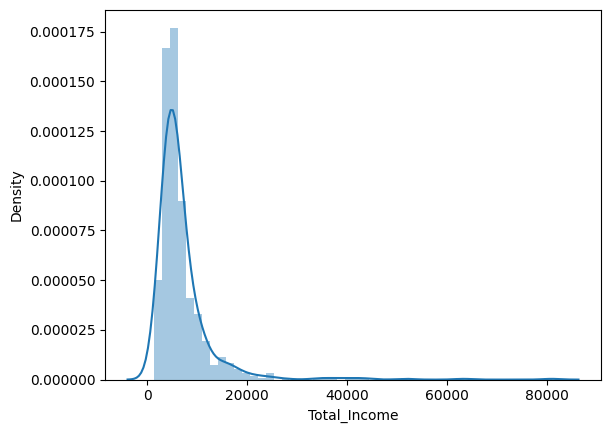

In [248]:
sns.distplot(train['Total_Income'])

In [249]:
train['Total_Income_log'] = np.log(train['Total_Income'])

In [250]:
test['Total_Income_log'] = np.log(test['Total_Income'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

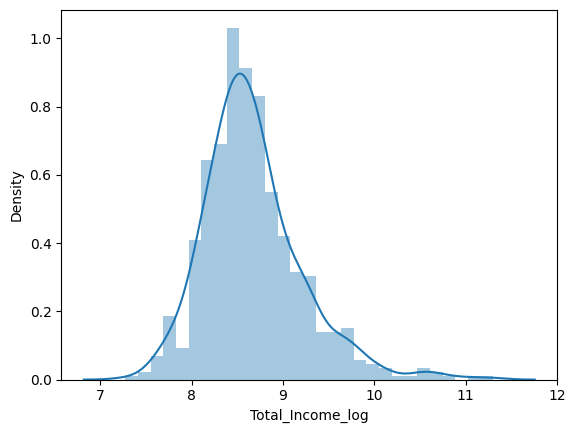

In [251]:
sns.distplot(train['Total_Income_log'])

EMI: EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate EMI by taking the ratio of loan amount with respect to loan amount term.

In [252]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term'] 

In [253]:
test['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term'] 

<Axes: xlabel='EMI', ylabel='Density'>

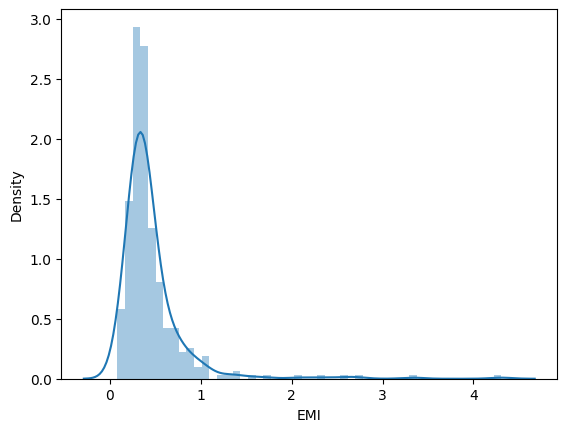

In [254]:
sns.distplot(test['EMI'])

Balance Income: This is the income left after the EMI has been paid. Idea behind creating this variable is that if the value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [255]:
train['Balance_Income'] = train['Total_Income'] - (train['EMI'] * 1000)

In [256]:
test['Balance_Income'] = train['Total_Income'] - (train['EMI'] * 1000)

<Axes: xlabel='Balance_Income', ylabel='Density'>

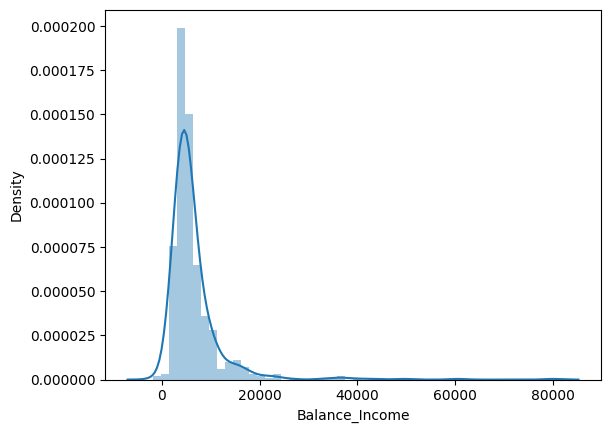

In [257]:
sns.distplot(train['Balance_Income'])

In [258]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [259]:
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

Model Building

In [260]:
X=train.drop('Loan_Status',axis=1)
X.head()

,Credit_History,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,4.852030,1,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,4.852030,0,1,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,4.189655,0,1,1,0,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,4.787492,0,1,0,1,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,4.948760,1,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


# Applying Logistic Regression

In [261]:
from sklearn.model_selection import StratifiedShuffleSplit

In [262]:
lr_model = LogisticRegression(random_state=1)

In [263]:
lr_model_score, lr_model_pred = stratified_cross_validation(lr_model)

In [264]:
print("\nMean of Accuracy Scores=",mean(lr_model_score))


Mean of Accuracy Scores= 0.7597402597402597


In [265]:
print(classification_report(y_cv,lr_model_pred))

              precision    recall  f1-score   support

           0       0.29      0.19      0.23        43
           1       0.72      0.82      0.77       111

    accuracy                           0.64       154
   macro avg       0.50      0.50      0.50       154
weighted avg       0.60      0.64      0.62       154



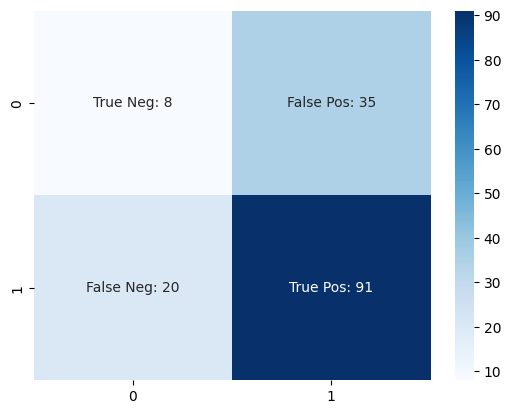

In [266]:
display_cf_matrix(y_cv,lr_model_pred)

 Decision Tree Model

In [267]:
dt_model = tree.DecisionTreeClassifier(random_state=1)

In [268]:
dt_model_score, dt_model_pred = stratified_cross_validation(dt_model)

In [269]:
print("\nMean of Accuracy Scores=",mean(dt_model_score))


Mean of Accuracy Scores= 0.6931818181818181


In [270]:
print(classification_report(y_cv,dt_model_pred))

              precision    recall  f1-score   support

           0       0.27      0.30      0.28        43
           1       0.71      0.68      0.69       111

    accuracy                           0.57       154
   macro avg       0.49      0.49      0.49       154
weighted avg       0.59      0.57      0.58       154



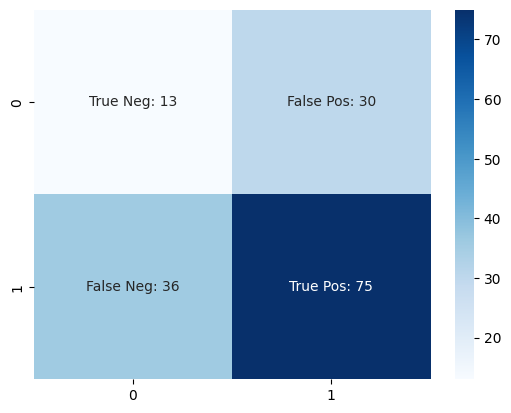

In [271]:
display_cf_matrix(y_cv,dt_model_pred)

Random Forest Model

In [272]:
rf_model = RandomForestClassifier(random_state=1, max_depth=10)

In [273]:
rf_model_score, rf_model_pred = stratified_cross_validation(rf_model)

In [274]:
print("\nMean of Accuracy Scores=",mean(rf_model_score))


Mean of Accuracy Scores= 0.7922077922077922


In [275]:
print(classification_report(y_cv,rf_model_pred))

              precision    recall  f1-score   support

           0       0.17      0.12      0.14        43
           1       0.69      0.77      0.73       111

    accuracy                           0.59       154
   macro avg       0.43      0.45      0.43       154
weighted avg       0.55      0.59      0.57       154



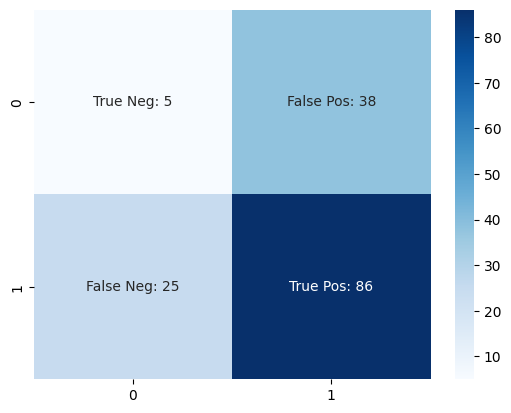

In [276]:
display_cf_matrix(y_cv,rf_model_pred)

Hyper-Parameter Tuning

In [277]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20)) }

In [278]:
grid_search= GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [279]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, train_size =0.75,random_state=1)

In [280]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [281]:
from sklearn.model_selection import GridSearchCV

In [282]:
GridSearchCV(cv='warn', error_score='raise-deprecating',estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             n_jobs=None,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(max_features='auto',
                                              n_estimators='warn',
                                              random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

Estimating the optimized value

In [283]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=1, n_estimators=1, random_state=1)

In [284]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [285]:
RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    criterion='gini',
    max_depth=1,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=1,
    n_jobs=None,
    oob_score=False,
    random_state=1,
    verbose=0,
    warm_start=False)                      

RandomForestClassifier(max_depth=1, max_features='auto', n_estimators=1,
                       random_state=1)

Tuned Random Forest Model

In [286]:
hyper_rf_model =  RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)

In [287]:
hyper_rf_model_score, hyper_rf_model_pred = stratified_cross_validation(hyper_rf_model)

In [288]:
print("\nMean of Accuracy Scores=",mean(hyper_rf_model_score))


Mean of Accuracy Scores= 0.8133116883116883


In [289]:
print(classification_report(y_cv,hyper_rf_model_pred))

              precision    recall  f1-score   support

           0       0.27      0.14      0.19        49
           1       0.67      0.82      0.74       105

    accuracy                           0.60       154
   macro avg       0.47      0.48      0.46       154
weighted avg       0.54      0.60      0.56       154



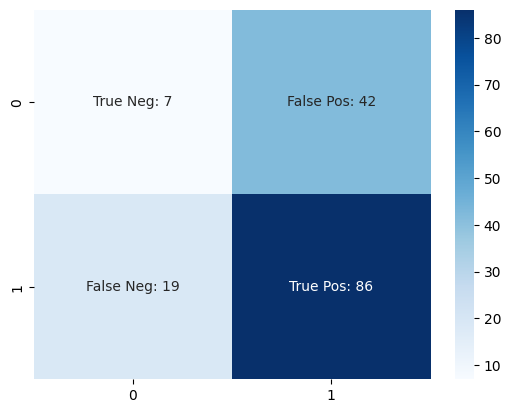

In [290]:
display_cf_matrix(y_cv,hyper_rf_model_pred)

Feature Importance

In [291]:
importances= pd.Series(hyper_rf_model.feature_importances_, index = X.columns).sort_values()

<Axes: >

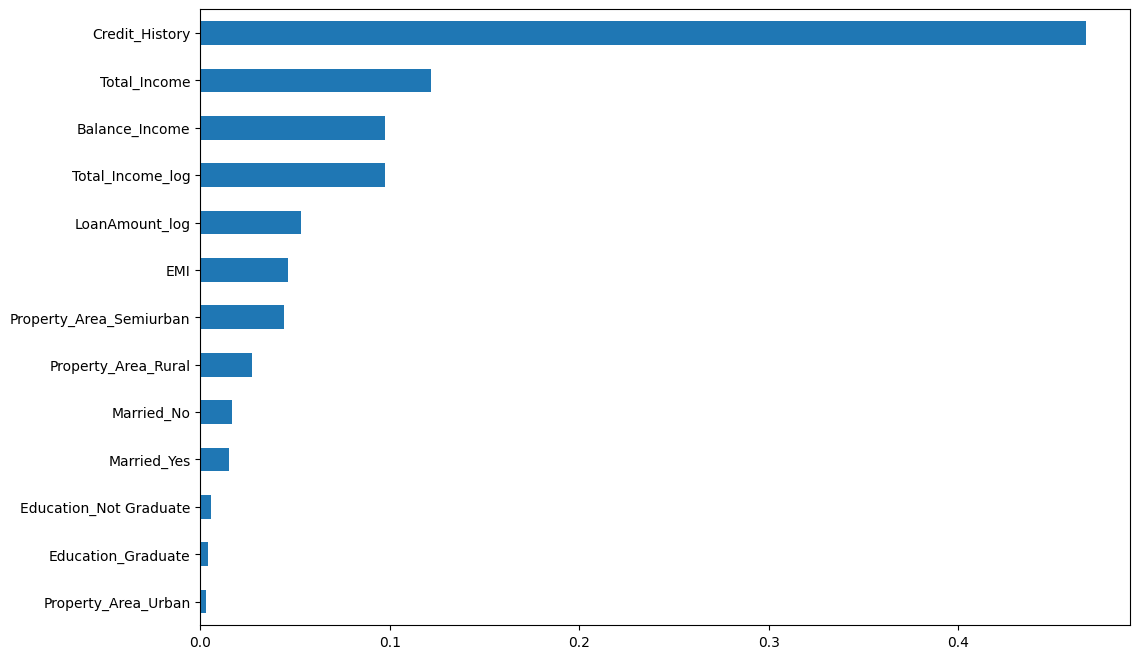

In [292]:
importances.plot(kind='barh', figsize=(12,8))

XGBoost

In [293]:
xgb_model = XGBClassifier(random_state=1, max_depth=4, n_estimators=50)

In [294]:
xgb_model_score, xgb_model_pred = stratified_cross_validation(xgb_model)

In [295]:
print("\nMean of Accuracy Scores=",mean(xgb_model_score))


Mean of Accuracy Scores= 0.7711038961038961


In [296]:
print(classification_report(y_cv,xgb_model_pred))

              precision    recall  f1-score   support

           0       0.31      0.20      0.25        49
           1       0.68      0.79      0.73       105

    accuracy                           0.60       154
   macro avg       0.50      0.50      0.49       154
weighted avg       0.56      0.60      0.58       154



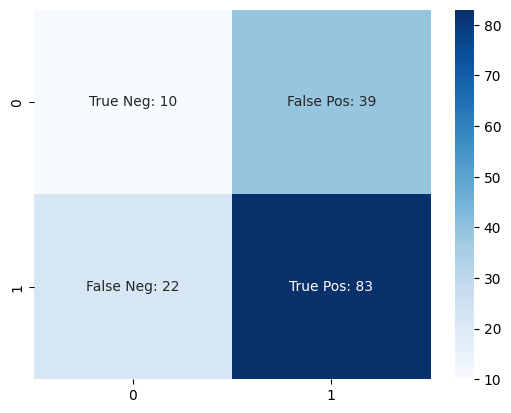

In [297]:
display_cf_matrix(y_cv,xgb_model_pred)

-----------------------THANK YOU----------------------